## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the answer notebook & trained model (for Question 3) to your github. 

5) Submit the assessment by sharing the link to your github containing the answers. 
    
</span>

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*4*, stride=*2*, padding=*1*)

W_out = ((W_in - Kernel Size + 2 * Padding) / Stride ) + 1 \
      = ((10 - 4 + 2 * 1) / 2 ) + 1 \
      = ( 8 / 2 ) + 1 \
      = 4 + 1 \
      = 5

H_out = ((H_in - Kernel Size + 2 * Padding) / Stride ) + 1 \
      = ((10 - 4 + 2 * 1) / 2 ) + 1 \
      = ( 8 / 2 ) + 1 \
      = 4 + 1 \
      = 5 
      
D_out = Output channels \
      = 12 
      
WxHxD = 5x5x12

<span style="color:blue">
    answer: The shape of the output is 5x5x12.
</span>

b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer) (2 marks)

[X] Individual feature map <br>
[ ] Instance in the mini-batch<br>
[ ] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer) (2 marks)

[ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.<br>
[ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.<br>
[ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.<br>
[X] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

[X] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.<br>
[ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [152]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )

Number of parameters \
= channel_in * channel_out + bias \
                     = 3 * 20 * 2 + 2 \
                     = 122
                     
<span style="color:blue">
    answer: There are 122 learnable parameters.
</span>

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

[X] Deep neural networks usually require a big amount of data to be properly trained.<br>
[ ] They can be fooled by adversarial/ noisy examples.<br>
[ ] They are difficult to interpret and understand.<br>
[ ] They can still be subject to biases.<br>
[ ] They fail to understand the context of the data that they are handling.<br>
[ ] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell. 

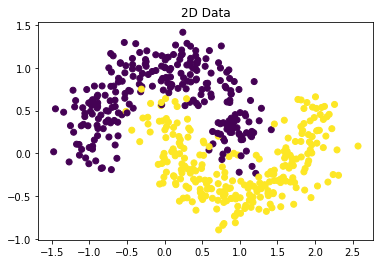

In [27]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    Answer: It cannot classify the data correctly as the data given is a non-linear data but the classifier is a linear classifier leading to high amounts of false positives.
</span>

**QUESTION 2 [50 marks]** 

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Train a feedforward neural network to solve the classification problem. Please include: **(10 marks)**

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) The training loop.

    4) Output the mean accuracy for the whole testing dataset.
    
    5) The hyperparameters are:
        i  - architecture: 2 hidden layers
        ii - input size  : 32x32 

In [156]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [157]:
transform = transforms.Compose(
    [transforms.Resize([32,32]), # QUESTION 2 a) 5) Input size  : 32x32 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

In [158]:
# QUESTION 2 a) 1) Dataloader

trainset = torchvision.datasets.ImageFolder(root='Covid19-dataset/train',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='Covid19-dataset/test',transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


classes = ('Covid', 'Normal', 'Viral Pneumonia')


train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

251
66


torch.Size([32, 3, 32, 32])


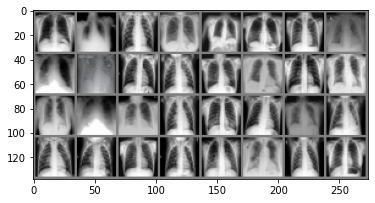

Covid Covid Viral Pneumonia Covid


In [159]:

def show_image(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)

show_image(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [170]:
# QUESTION 2 a) 2) Model definition by class method

class myModel(nn.Module): 
    def __init__(self): 
        super(myModel, self).__init__() 
        self.linear1 = nn.Linear(3072, 1536) 
        self.linear2 = nn.Linear(1536, 768) # QUESTION 2 a) 5) 
        self.linear3 = nn.Linear(768, 27)   # architecture: 2 hidden layers (self.linear2 & self.linear3)
        self.linear4 = nn.Linear(27, 3) 
        self.relu = nn.ReLU()
  
    def forward(self, x): 
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        o = self.linear4(x)

        return o 
    
model = myModel()

In [172]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

myModel(
  (linear1): Linear(in_features=3072, out_features=1536, bias=True)
  (linear2): Linear(in_features=1536, out_features=768, bias=True)
  (linear3): Linear(in_features=768, out_features=27, bias=True)
  (linear4): Linear(in_features=27, out_features=3, bias=True)
  (relu): ReLU()
)

In [173]:
import time 

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        model.train()
        
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            inputs = inputs.view(inputs.size(0), -1)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            loss = loss_criterion(outputs, labels)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
 
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            train_acc += acc.item() * inputs.size(0)

            
        with torch.no_grad():

            model.eval()

            
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                inputs = inputs.view(inputs.size(0), -1)
                labels = labels.to(device)

                outputs = model(inputs)

                loss = loss_criterion(outputs, labels)


                valid_loss += loss.item() * inputs.size(0)

                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                valid_acc += acc.item() * inputs.size(0)

           
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'Q2_1917197_'+str(epoch)+'.pt')
            
    return model, history

In [174]:
# QUESTION 2 a) 3) Training loop for 10 epochs

num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.9360, Accuracy: 69.7211%, 
		Validation : Loss : 0.8041, Accuracy: 71.2121%, Time: 7.8005s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.5629, Accuracy: 88.4462%, 
		Validation : Loss : 0.6049, Accuracy: 72.7273%, Time: 7.1257s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3368, Accuracy: 90.8367%, 
		Validation : Loss : 0.6005, Accuracy: 71.2121%, Time: 7.1306s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.2758, Accuracy: 88.4462%, 
		Validation : Loss : 0.4995, Accuracy: 80.3030%, Time: 7.4396s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.2298, Accuracy: 90.4382%, 
		Validation : Loss : 0.5180, Accuracy: 80.3030%, Time: 7.1204s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1869, Accuracy: 93.2271%, 
		Validation : Loss : 0.4269, Accuracy: 86.3636%, Time: 7.2005s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1547, Accuracy: 94.4223%, 
		Validation : Loss : 0.4920, Accuracy: 81.8182%, Time: 7.1746s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1426, Accuracy: 94.

In [175]:
# QUESTION 2 a) 4) Mean accuracy for whole dataset

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        images = images.view(images.size(0), -1)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 83 %


In [176]:
# QUESTION 2 a) 4) Accuracy by class

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Covid is 92.3 %
Accuracy for class: Normal is 65.0 %
Accuracy for class: Viral Pneumonia is 90.0 %


b) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [2]:
transform = transforms.Compose(
    [transforms.Resize([32,32]), # QUESTION 2 a) 5) Input size  : 32x32 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

In [3]:
# QUESTION 2 a) 1) Dataloader

trainset = torchvision.datasets.ImageFolder(root='Covid19-dataset/train',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='Covid19-dataset/test',transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


classes = ('Covid', 'Normal', 'Viral Pneumonia')


train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

251
66


In [4]:
# QUESTION 2 a) 2) Model definition by class method

class myModel(nn.Module): 
    def __init__(self): 
        super(myModel, self).__init__()
        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 120, 5)
        self.fc1 = nn.Linear(120, 10)
        self.fc2 = nn.Linear(10, 3) 
        self.relu = nn.ReLU()
  
    def forward(self, x): 
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = x.view(-1, 120 * 1 * 1)
        x = self.relu(self.fc1(x))
        o = self.fc2(x)

        return o 
    
model = myModel()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

myModel(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [6]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'Q2b weights\Q2b_1917197_'+str(epoch)+'.pt')
            
    return model, history




In [7]:
# QUESTION 2 a) 3) Training loop for 10 epochs

num_epochs = 20
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/20
Epoch : 000, Training: Loss: 1.1062, Accuracy: 27.8884%, 
		Validation : Loss : 1.1021, Accuracy: 30.3030%, Time: 7.8556s
Epoch: 2/20
Epoch : 001, Training: Loss: 1.1023, Accuracy: 27.8884%, 
		Validation : Loss : 1.0990, Accuracy: 30.3030%, Time: 7.4335s
Epoch: 3/20
Epoch : 002, Training: Loss: 1.0985, Accuracy: 27.8884%, 
		Validation : Loss : 1.0956, Accuracy: 30.3030%, Time: 7.7307s
Epoch: 4/20
Epoch : 003, Training: Loss: 1.0945, Accuracy: 27.8884%, 
		Validation : Loss : 1.0916, Accuracy: 30.3030%, Time: 7.6677s
Epoch: 5/20
Epoch : 004, Training: Loss: 1.0893, Accuracy: 30.6773%, 
		Validation : Loss : 1.0869, Accuracy: 42.4242%, Time: 7.7498s
Epoch: 6/20
Epoch : 005, Training: Loss: 1.0838, Accuracy: 46.2151%, 
		Validation : Loss : 1.0805, Accuracy: 57.5758%, Time: 7.5207s
Epoch: 7/20
Epoch : 006, Training: Loss: 1.0758, Accuracy: 60.1594%, 
		Validation : Loss : 1.0725, Accuracy: 60.6061%, Time: 7.5908s
Epoch: 8/20
Epoch : 007, Training: Loss: 1.0673, Accuracy: 53.

c) Based on Question 2 b), answer the following questions: 
    
    i) Is the model overfitting? Why? (4 marks)
   
    
   

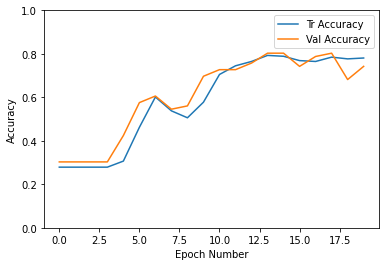

In [8]:
# 6. Analyze the accuracy curve
history = np.array(history)
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
# plt.savefig('Q2b_1917197.png')
plt.show()

<font color='blue'>YES because the model is more accurate with the training dataset than it does with the validation dataset.
Meaning that the model performs better on the training dataset than it does with the validation dataset, it _"fits"_
the training dataset too well.</font>

 ii) Propose two methods to reduce the effect of overfitting. (4 marks)\
   <font color='blue'>Two methods that I propose are:<br><br>
    (1) Batch normalization as it adds noise to the inputs discouraging the model to learn deterministic patterns of 
    the training dataset.<br><br>  
    (2) Data augmentation as it adds more data for the model to train and also add variety to the dataset which discourages the model to learn deterministic patterns.
   </font> <br><br>
    iii) Implement the two proposed methods in Q2 c) ii) in the next cell and show that the overfitting has been reduced. (8 marks) <br>  
    
## BATCH NORM

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [2]:
transform = transforms.Compose(
    [transforms.Resize([32,32]), # QUESTION 2 a) 5) Input size  : 32x32 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

In [3]:
# QUESTION 2 a) 1) Dataloader

trainset = torchvision.datasets.ImageFolder(root='Covid19-dataset/train',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='Covid19-dataset/test',transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


classes = ('Covid', 'Normal', 'Viral Pneumonia')


train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

251
66


In [8]:
# QUESTION 2 a) 2) Model definition by class method

class myModel(nn.Module): 
    def __init__(self): 
        super(myModel, self).__init__()
        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)             # !!BATCH NORM!!
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 120, 5)
        self.fc1 = nn.Linear(120, 10)
        self.fc2 = nn.Linear(10, 3) 
        self.relu = nn.ReLU()
  
    def forward(self, x): 
        x = self.pool(self.relu(self.conv1(x)))
        x = self.bn1(x)                          # !!BATCH NORM!!
        x = self.pool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = x.view(-1, 120 * 1 * 1)
        x = self.relu(self.fc1(x))
        o = self.fc2(x)

        return o 
    
model = myModel()

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

myModel(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [10]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'Q2b batch norm\Q2b_bn_1917197_'+str(epoch)+'.pt')
            
    return model, history



In [11]:
num_epochs = 20
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/20
Epoch : 000, Training: Loss: 1.0872, Accuracy: 41.4343%, 
		Validation : Loss : 1.0952, Accuracy: 33.3333%, Time: 8.9109s
Epoch: 2/20
Epoch : 001, Training: Loss: 1.0656, Accuracy: 62.1514%, 
		Validation : Loss : 1.0880, Accuracy: 43.9394%, Time: 7.4315s
Epoch: 3/20
Epoch : 002, Training: Loss: 1.0459, Accuracy: 76.4940%, 
		Validation : Loss : 1.0747, Accuracy: 57.5758%, Time: 7.3932s
Epoch: 4/20
Epoch : 003, Training: Loss: 1.0224, Accuracy: 83.6653%, 
		Validation : Loss : 1.0548, Accuracy: 60.6061%, Time: 7.7097s
Epoch: 5/20
Epoch : 004, Training: Loss: 0.9953, Accuracy: 85.6574%, 
		Validation : Loss : 1.0265, Accuracy: 74.2424%, Time: 7.5673s
Epoch: 6/20
Epoch : 005, Training: Loss: 0.9639, Accuracy: 87.6494%, 
		Validation : Loss : 0.9901, Accuracy: 78.7879%, Time: 7.7808s
Epoch: 7/20
Epoch : 006, Training: Loss: 0.9292, Accuracy: 85.2590%, 
		Validation : Loss : 0.9477, Accuracy: 87.8788%, Time: 7.6657s
Epoch: 8/20
Epoch : 007, Training: Loss: 0.8895, Accuracy: 85.

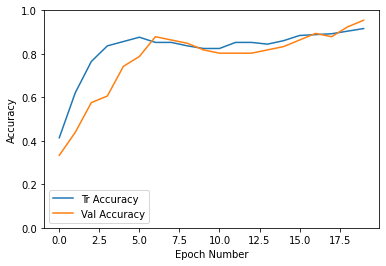

In [12]:
# 6. Analyze the accuracy curve
history = np.array(history)
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
# plt.savefig('Q2b_1917197.png')
plt.show()

<font color='blue'>Adding a batch normalization layer not only prevented overfitting but also increased the
overall accuracy of the model (from 74.24% to 95.45% on val).</font>

## Data Augmentation

In [1]:
import os

#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [2]:
transforms = {
    'train': transforms.Compose(
    [transforms.Resize([32,32]), 
     transforms.RandomRotation(degrees=15), # !!DATA AUGMENTATION ON TRAINING DATASET!!
     transforms.CenterCrop(size=32),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    
    'test': transforms.Compose(
    [transforms.Resize([32,32]), # !!TEST REMAINS THE SAME!!
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
}

batch_size = 32

In [3]:
trainset = torchvision.datasets.ImageFolder(root='Covid19-dataset/train',transform=transforms['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='Covid19-dataset/test',transform=transforms['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


classes = ('Covid', 'Normal', 'Viral Pneumonia')


train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

251
66


torch.Size([32, 3, 32, 32])


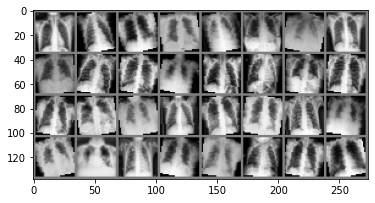

Normal Viral Pneumonia Covid Covid


In [4]:
def show_image(img): # 
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)        #!!SHOWS AUGMENTATION DONE ON TRAINING DATASET!!
images, labels = next(dataiter)
print(images.shape)

show_image(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [5]:
class myModel(nn.Module): 
    def __init__(self): 
        super(myModel, self).__init__()
        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 120, 5)
        self.fc1 = nn.Linear(120, 10)
        self.fc2 = nn.Linear(10, 3) 
        self.relu = nn.ReLU()
  
    def forward(self, x): 
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))       
        x = self.relu(self.conv3(x))
        x = x.view(-1, 120 * 1 * 1)
        x = self.relu(self.fc1(x))
        o = self.fc2(x)

        return o 
    
model = myModel()

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

myModel(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [7]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'Q2b aug\Q2b_aug_1917197_'+str(epoch)+'.pt')
            
    return model, history


In [8]:
num_epochs = 20
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/20
Epoch : 000, Training: Loss: 1.0855, Accuracy: 44.2231%, 
		Validation : Loss : 1.0913, Accuracy: 39.3939%, Time: 8.2210s
Epoch: 2/20
Epoch : 001, Training: Loss: 1.0814, Accuracy: 44.2231%, 
		Validation : Loss : 1.0875, Accuracy: 39.3939%, Time: 7.4189s
Epoch: 3/20
Epoch : 002, Training: Loss: 1.0759, Accuracy: 44.2231%, 
		Validation : Loss : 1.0834, Accuracy: 39.3939%, Time: 7.1375s
Epoch: 4/20
Epoch : 003, Training: Loss: 1.0703, Accuracy: 44.6215%, 
		Validation : Loss : 1.0780, Accuracy: 39.3939%, Time: 7.1630s
Epoch: 5/20
Epoch : 004, Training: Loss: 1.0622, Accuracy: 44.6215%, 
		Validation : Loss : 1.0701, Accuracy: 39.3939%, Time: 6.9966s
Epoch: 6/20
Epoch : 005, Training: Loss: 1.0511, Accuracy: 45.0199%, 
		Validation : Loss : 1.0607, Accuracy: 42.4242%, Time: 7.0759s
Epoch: 7/20
Epoch : 006, Training: Loss: 1.0378, Accuracy: 45.8167%, 
		Validation : Loss : 1.0473, Accuracy: 42.4242%, Time: 7.1479s
Epoch: 8/20
Epoch : 007, Training: Loss: 1.0186, Accuracy: 48.

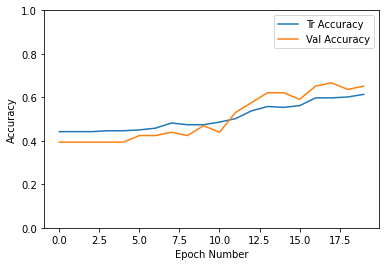

In [9]:
# 6. Analyze the accuracy curve
history = np.array(history)
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
# plt.savefig('Q2b_1917197.png')
plt.show()

<font color='blue'>Adding data augmentation overcomes overfitting as the training dataset has increased in randomness, allowing the model to not learn deterministic patterns from the training dataset that makes the model to be able to generalize easier.</font>

d) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

251
66
torch.Size([32, 3, 224, 224])


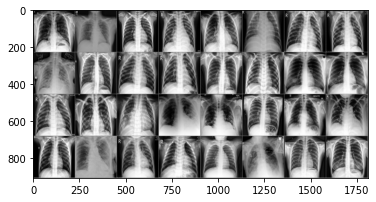

Covid Covid Normal Viral Pneumonia


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

transform = transforms.Compose(
    [transforms.Resize([224,224]), # QUESTION 2 a) 5) Input size  : 32x32 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

# QUESTION 2 a) 1) Dataloader

trainset = torchvision.datasets.ImageFolder(root='Covid19-dataset/train',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='Covid19-dataset/test',transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


classes = ('Covid', 'Normal', 'Viral Pneumonia')


train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device
def show_image(img): # 
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)        
images, labels = next(dataiter)
print(images.shape)

show_image(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'Finetuned model/Resnet50_'+str(epoch)+'.pt')
            
    return model, history

In [3]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [5]:
model_ft = models.densenet121(pretrained=True)

model_ft.fc=nn.Linear(in_features=1024, out_features=3, bias=True) # !!CHANGE OUT_FEATURES TO 3!!

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
model_ft

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [6]:
num_epochs = 20
trained_model, history = train_and_validate(model_ft, criterion, optimizer_ft, num_epochs)


Epoch: 1/20
Epoch : 000, Training: Loss: 6.4451, Accuracy: 13.9442%, 
		Validation : Loss : 4.4029, Accuracy: 15.1515%, Time: 9.8835s
Epoch: 2/20
Epoch : 001, Training: Loss: 0.5525, Accuracy: 91.2351%, 
		Validation : Loss : 0.3906, Accuracy: 77.2727%, Time: 7.9973s
Epoch: 3/20
Epoch : 002, Training: Loss: 0.0707, Accuracy: 98.4064%, 
		Validation : Loss : 0.2049, Accuracy: 90.9091%, Time: 7.9956s
Epoch: 4/20
Epoch : 003, Training: Loss: 0.0125, Accuracy: 100.0000%, 
		Validation : Loss : 0.1123, Accuracy: 95.4545%, Time: 8.2609s
Epoch: 5/20
Epoch : 004, Training: Loss: 0.0164, Accuracy: 99.2032%, 
		Validation : Loss : 0.0678, Accuracy: 95.4545%, Time: 7.8908s
Epoch: 6/20
Epoch : 005, Training: Loss: 0.0350, Accuracy: 98.0080%, 
		Validation : Loss : 0.0521, Accuracy: 95.4545%, Time: 7.9108s
Epoch: 7/20
Epoch : 006, Training: Loss: 0.0053, Accuracy: 100.0000%, 
		Validation : Loss : 0.0350, Accuracy: 100.0000%, Time: 8.2469s
Epoch: 8/20
Epoch : 007, Training: Loss: 0.0129, Accuracy: 

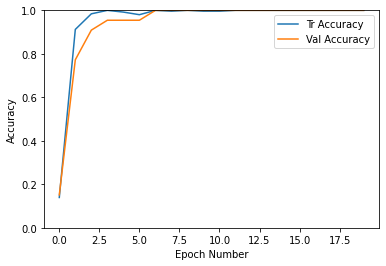

In [7]:
# 6. Analyze the accuracy curve
history = np.array(history)
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
# plt.savefig('Q2b_1917197.png')
plt.show()

e) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<span style="color:blue">
    YES, it has given an improvement in accuracy (from 95.4545% [BATCH NORM] to 100%). Albeit the validation accuracy is 100%, we need to keep in mind that this is a small dataset and may fail at some instance during deployment. The model also seems to be overfitting before reaching 100% on validation accuracy.  <br><br>Transfer learning improved the model as it trained on a pretrained model that has been used on another task. In the case of PyTorch pretrained models, the weights are obtained from training using the ImageNet dataset which contains 1,281,167 images. <br><br>This saves a significant amount of time and resources, as training a machine learning model from scratch can be a time-consuming and computationally intensive process.Transfer learning can also improve the performance of a model on the new task, as the model can start with knowledge (weights) learned from the previous task and use it as a starting point.   </span>

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverables for this question are:

- the model file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- 5 marks for plausible detection of each gesture.

In [1]:
import os
os.chdir(r"E:\Programming\Assessment\yolov5")

import torch
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np
import bb_utils

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="gZtWyNANXH0qs9cmHxLe")
project = rf.workspace("fyp-nsbzp").project("assessment-eh1rk")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Assessment-1 in yolov5pytorch:: 100%|████████████| 536/536 [00:00<00:00, 3413.35it/s]


In [3]:
!python train.py --data Assessment-1/data.yaml --weights yolov5s.pt --img 640 --epochs 100 --batch-size 16

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=Assessment-1/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-12-13 Python-3.9.12 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shea

       6/99      3.77G    0.05803    0.02026    0.03571         31        640:  20%|##        | 3/15 [00:00<00:01,  6.77it/s]
       6/99      3.77G     0.0522    0.02139    0.03249         34        640:  20%|##        | 3/15 [00:00<00:01,  6.77it/s]
       6/99      3.77G     0.0522    0.02139    0.03249         34        640:  27%|##6       | 4/15 [00:00<00:01,  7.20it/s]
       6/99      3.77G    0.05191    0.02064    0.03338         25        640:  27%|##6       | 4/15 [00:00<00:01,  7.20it/s]
       6/99      3.77G    0.05191    0.02064    0.03338         25        640:  33%|###3      | 5/15 [00:00<00:01,  7.46it/s]
       6/99      3.77G    0.05401    0.02009     0.0326         26        640:  33%|###3      | 5/15 [00:00<00:01,  7.46it/s]
       6/99      3.77G    0.05401    0.02009     0.0326         26        640:  40%|####      | 6/15 [00:00<00:01,  6.56it/s]
       6/99      3.77G    0.05702    0.02014    0.03311         32        640:  40%|####      | 6/15 [00:01<00:01,  6.

      11/99      3.77G    0.04794    0.01714    0.02824         25        640:  73%|#######3  | 11/15 [00:01<00:00,  6.62it/s]
      11/99      3.77G    0.04647    0.01707    0.02742         32        640:  73%|#######3  | 11/15 [00:01<00:00,  6.62it/s]
      11/99      3.77G    0.04647    0.01707    0.02742         32        640:  80%|########  | 12/15 [00:01<00:00,  6.98it/s]
      11/99      3.77G    0.04782    0.01704    0.02848         27        640:  80%|########  | 12/15 [00:01<00:00,  6.98it/s]
      11/99      3.77G    0.04782    0.01704    0.02848         27        640:  87%|########6 | 13/15 [00:01<00:00,  7.01it/s]
      11/99      3.77G     0.0466    0.01714    0.02786         33        640:  87%|########6 | 13/15 [00:01<00:00,  7.01it/s]
      11/99      3.77G     0.0466    0.01714    0.02786         33        640:  93%|#########3| 14/15 [00:01<00:00,  7.53it/s]
      11/99      3.77G    0.04651    0.01705    0.02731          6        640:  93%|#########3| 14/15 [00:02<00


                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  3.95it/s]
                   all         21         20       0.94      0.958       0.98       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/15 [00:00<?, ?it/s]
      86/99      3.77G      0.037    0.00952   0.009012         27        640:   0%|          | 0/15 [00:00<?, ?it/s]
      86/99      3.77G      0.037    0.00952   0.009012         27        640:   7%|6         | 1/15 [00:00<00:01,  7.14it/s]
      86/99      3.77G    0.03782   0.009521    0.01243         33        640:   7%|6         | 1/15 [00:00<00:01,  7.14it/s]
      86/99      3.77

In [6]:
!python detect.py --weights runs/train/exp/weights/Amin.pt --img 416 --conf 0.4 --source 0

detect: weights=['runs/train/exp/weights/Amin.pt'], source=0, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2022-12-13 Python-3.9.12 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
1/1: 0...  Success (inf frames 640x360 at 30.00 FPS)

0: 256x416 (no detections), 213.8ms
0: 256x416 (no detections), 1.0ms
0: 256x416 (no detections), 12.4ms
0: 256x416 (no detections), 3.0ms
0: 256x416 (no detections), 10.7ms
0: 256x416 (no detections), 10.9ms
0: 256x416 (no detections), 8.0ms
0: 256x416 (no detections), 8.0ms
0: 256x416 (no detections

0: 256x416 (no detections), 8.0ms
0: 256x416 (no detections), 7.5ms
0: 256x416 (no detections), 10.2ms
0: 256x416 (no detections), 8.2ms
0: 256x416 (no detections), 7.5ms
0: 256x416 (no detections), 10.0ms
0: 256x416 (no detections), 1.0ms
0: 256x416 (no detections), 9.7ms
0: 256x416 (no detections), 7.7ms
0: 256x416 (no detections), 0.0ms
0: 256x416 (no detections), 5.0ms
0: 256x416 (no detections), 10.4ms
0: 256x416 (no detections), 8.0ms
0: 256x416 (no detections), 9.1ms
0: 256x416 (no detections), 1.0ms
0: 256x416 (no detections), 7.5ms
0: 256x416 (no detections), 11.1ms
0: 256x416 (no detections), 8.0ms
0: 256x416 (no detections), 7.5ms
0: 256x416 (no detections), 10.0ms
0: 256x416 (no detections), 0.0ms
0: 256x416 (no detections), 10.8ms
0: 256x416 (no detections), 5.7ms
0: 256x416 (no detections), 10.3ms
0: 256x416 (no detections), 14.3ms
0: 256x416 (no detections), 2.5ms
0: 256x416 (no detections), 9.3ms
0: 256x416 (no detections), 14.5ms
0: 256x416 (no detections), 6.5ms
0: 25

![pic](https://raw.githubusercontent.com/amin-rosli/DLCV-Workshop-1917197/main/Assessment/roboflow.jpg)
<span style="color:blue">
The model used was yolov5s with a batch size of 16 and epochs of 100.The model was trained on 100 images consisting of the "shaka", "peace" and "thumbs up". 10 background images were included to reduce false positives on the background. Data augmentation of rotation, brightness and exposure was applied using Roboflow that resulted in 262 final images for the whole dataset. <br><br> The model performed well in the testing environment, but it could definitely be improved by including more variations in background or a different person in the dataset. But limitations in time, the training dataset was only produced with pictures in the mahallah room. Deploying this model to any other environments may result in worse performance.<br><br> Here are some pictures showcasing the model:<br></span> 

![pic](https://raw.githubusercontent.com/amin-rosli/DLCV-Workshop-1917197/main/Assessment/cv1.jpg)
![pic](https://raw.githubusercontent.com/amin-rosli/DLCV-Workshop-1917197/main/Assessment/cv2.jpg)
![pic](https://raw.githubusercontent.com/amin-rosli/DLCV-Workshop-1917197/main/Assessment/cv3.jpg)
